# **Introduction**
Emotion recognition is a critical component in advancing human-computer interaction, enabling machines to interpret and respond to human emotions accurately. This project aims to develop an emotion recognition system using the Toronto Emotional Speech Set (TESS). The dataset consists of audio recordings of actors expressing various emotions, providing a robust foundation for training and evaluating the model. By leveraging machine learning techniques and deep learning architectures such as Long Short-Term Memory (LSTM) networks, this project seeks to classify speech data into distinct emotional categories. The following sections outline the process of data preprocessing, feature extraction, model creation, and performance evaluation, offering insights into the technical implementation and results achieved.

# **Dataset Preparation**

In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
# Create a kaggle folder
! mkdir ~/.kaggle/

In [3]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 425M/428M [00:04<00:00, 107MB/s]
100% 428M/428M [00:04<00:00, 96.9MB/s]


In [4]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [6]:
paths =[]
labels = []

for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')



Dataset is loaded


In [7]:
len(paths)

2800

In [8]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_size_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_perch_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_voice_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_sub_disgust.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_tell_disgust.wav']

In [9]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [10]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,disgust
1,/content/tess toronto emotional speech set dat...,disgust
2,/content/tess toronto emotional speech set dat...,disgust
3,/content/tess toronto emotional speech set dat...,disgust
4,/content/tess toronto emotional speech set dat...,disgust


In [11]:
df['label'].value_counts()

label
disgust    400
fear       400
ps         400
happy      400
sad        400
angry      400
neutral    400
Name: count, dtype: int64

In [12]:
df['label_count']= df['label'].value_counts()

In [13]:
df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,disgust
1,/content/tess toronto emotional speech set dat...,disgust
2,/content/tess toronto emotional speech set dat...,disgust
3,/content/tess toronto emotional speech set dat...,disgust
4,/content/tess toronto emotional speech set dat...,disgust
...,...,...
2795,/content/tess toronto emotional speech set dat...,neutral
2796,/content/tess toronto emotional speech set dat...,neutral
2797,/content/tess toronto emotional speech set dat...,neutral
2798,/content/tess toronto emotional speech set dat...,neutral


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

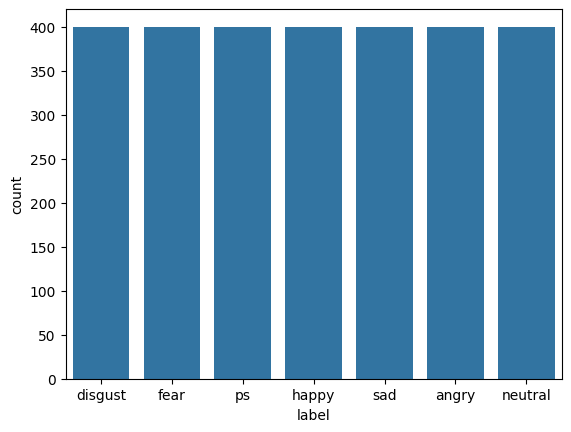

In [15]:
sns.countplot(data=df, x='label')

In [16]:
df

,speech,label,label_count
0,/content/tess toronto emotional speech set dat...,disgust,NaN
1,/content/tess toronto emotional speech set dat...,disgust,NaN
2,/content/tess toronto emotional speech set dat...,disgust,NaN
3,/content/tess toronto emotional speech set dat...,disgust,NaN
4,/content/tess toronto emotional speech set dat...,disgust,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,neutral,NaN
2796,/content/tess toronto emotional speech set dat...,neutral,NaN
2797,/content/tess toronto emotional speech set dat...,neutral,NaN
2798,/content/tess toronto emotional speech set dat...,neutral,NaN


In [17]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [19]:
df.drop('label_count', axis=1, inplace = True)

In [20]:
print(df.head())
print(df['label'].unique())

                                              speech    label
0  /content/tess toronto emotional speech set dat...  disgust
1  /content/tess toronto emotional speech set dat...  disgust
2  /content/tess toronto emotional speech set dat...  disgust
3  /content/tess toronto emotional speech set dat...  disgust
4  /content/tess toronto emotional speech set dat...  disgust
['disgust' 'fear' 'ps' 'happy' 'sad' 'angry' 'neutral']


In [21]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_size_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_perch_disgust.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_voice_disgust.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_note_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_name_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_rot_neutral.wav'],
      dtype=object)

# **Visualize Audio data for different Emotions**

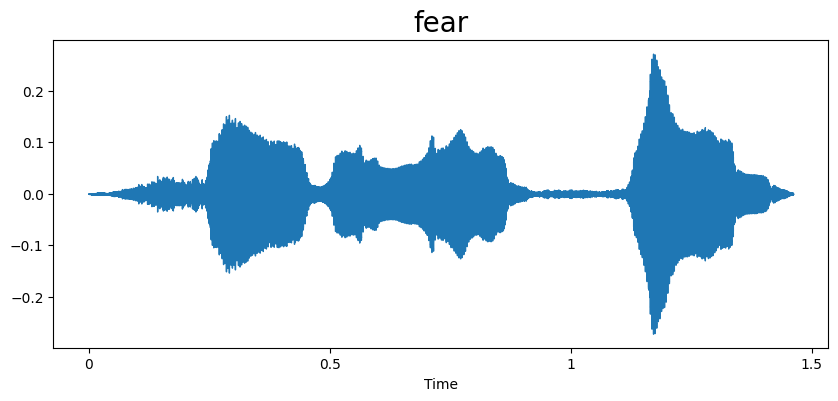

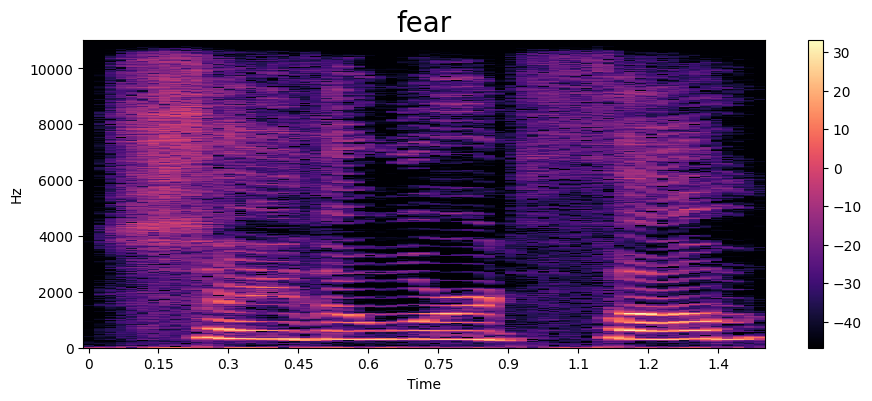

In [22]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

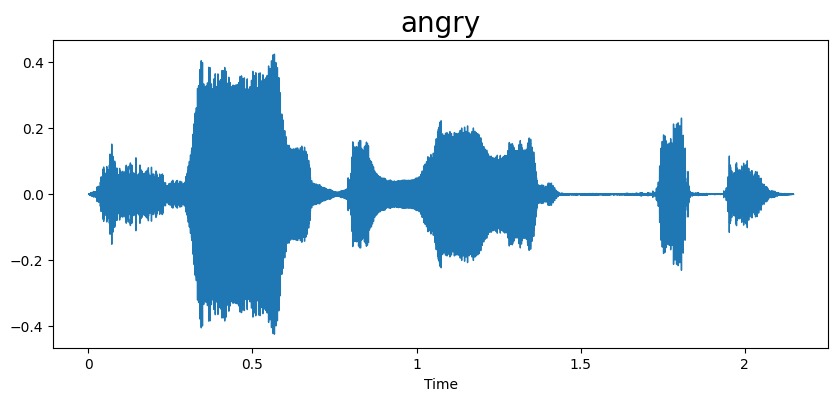

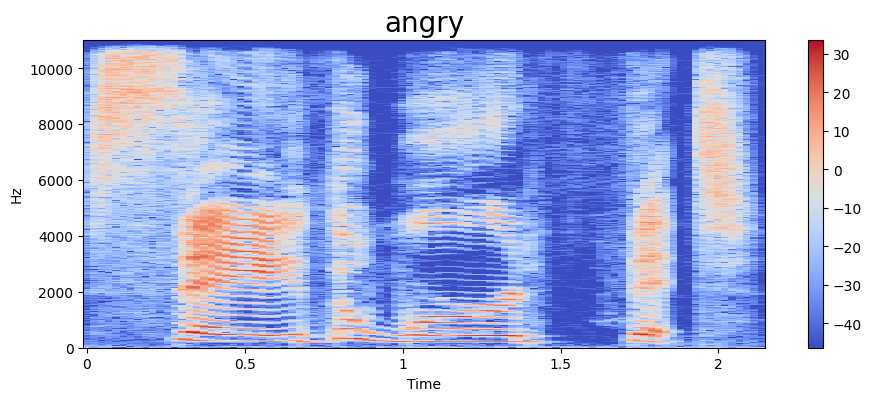

In [24]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


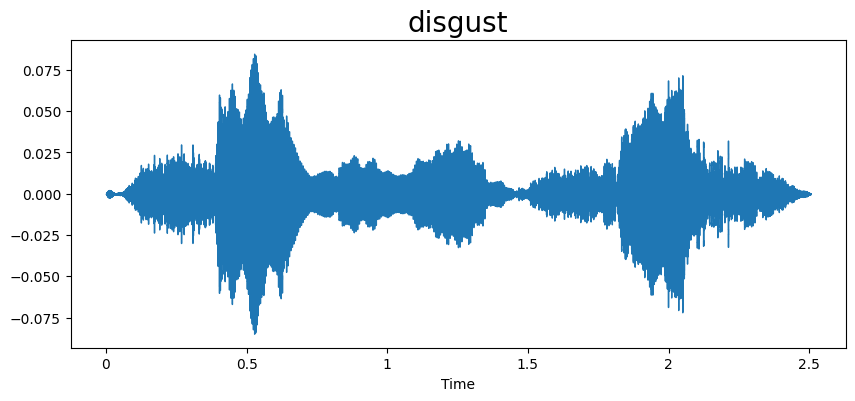

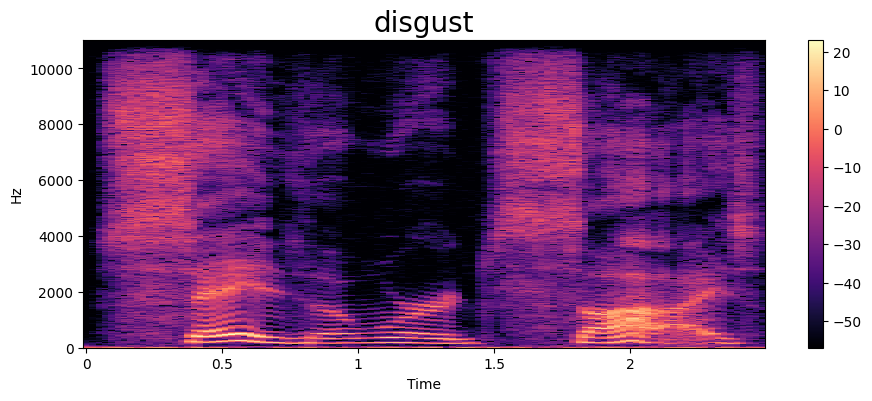

In [25]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


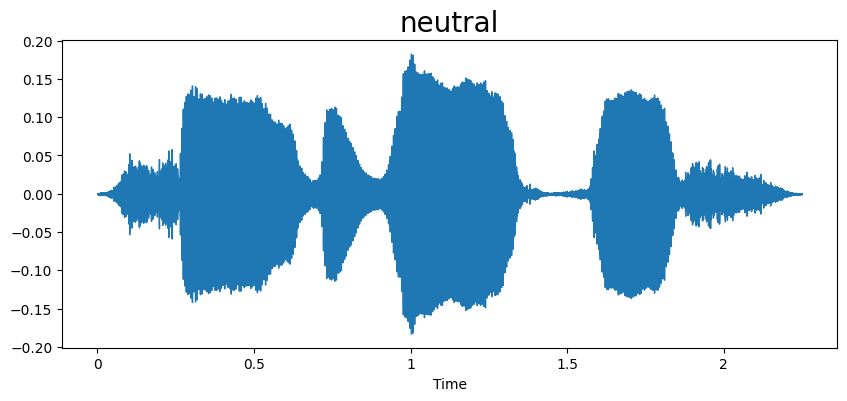

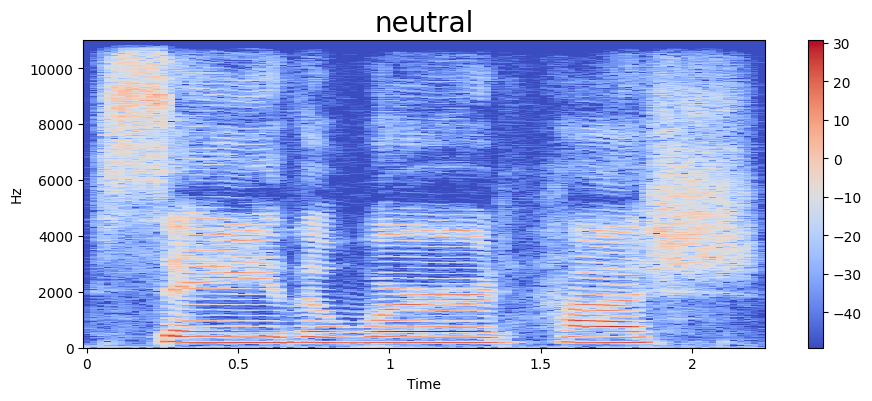

In [26]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


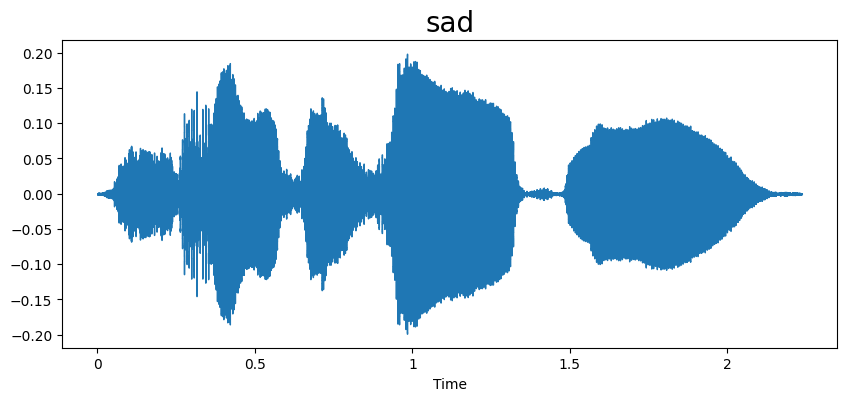

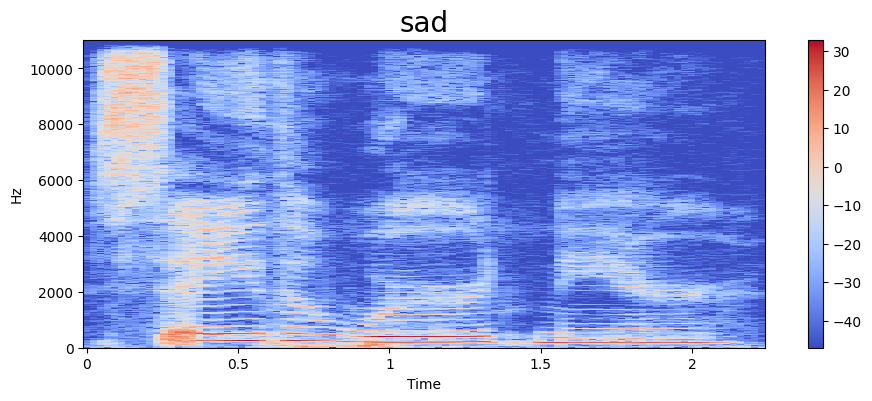

In [27]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


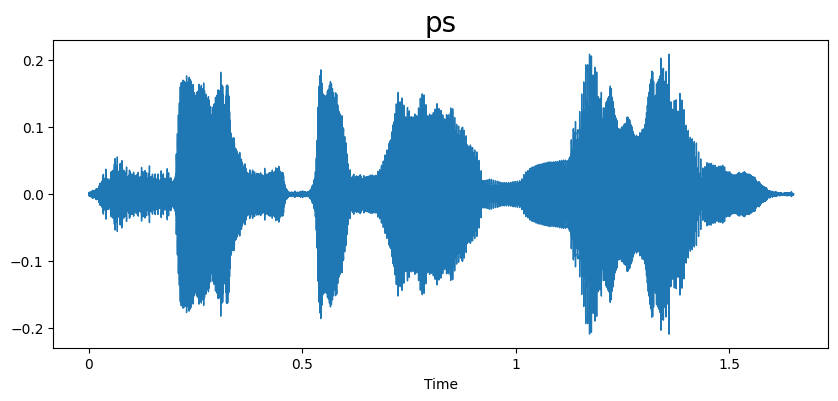

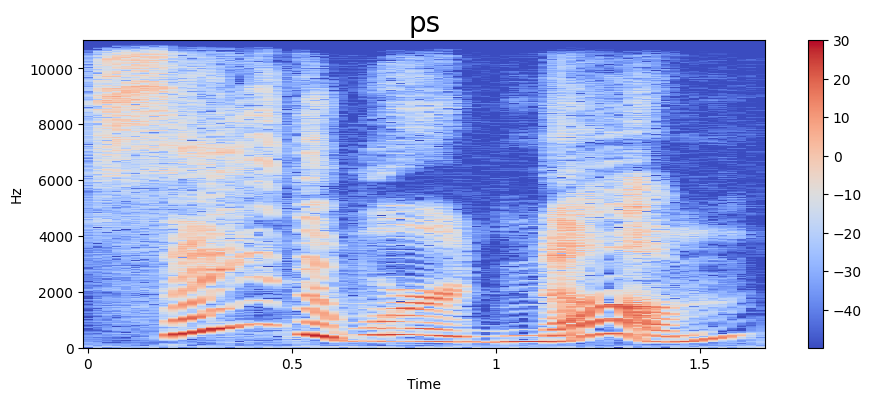

In [28]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


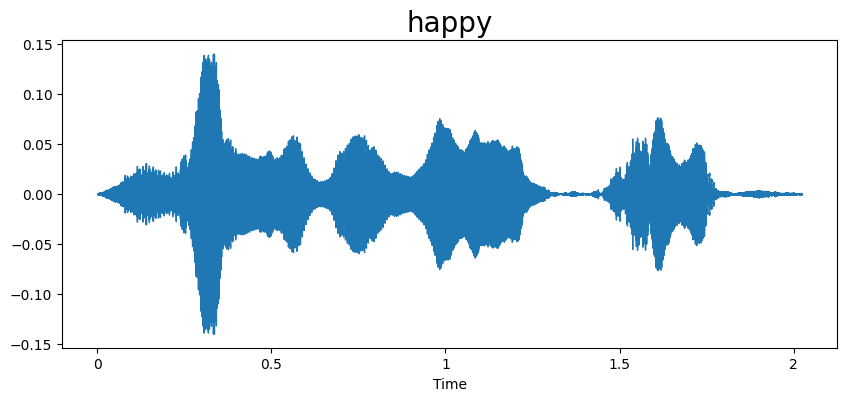

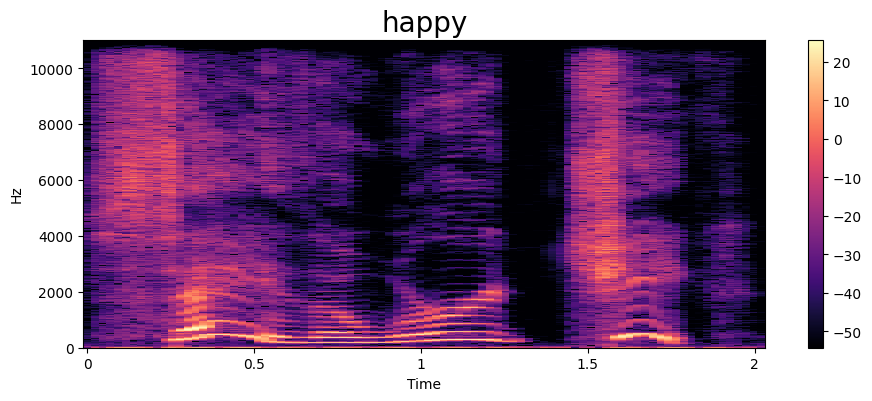

In [29]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


## **Feature** **Extraction**

In [30]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [31]:
extract_mfcc(df['speech'][0])

array([-4.6051468e+02,  8.5259483e+01,  8.9410000e+00, -3.2619503e+00,
        3.1773794e+00,  1.2273461e+01, -1.0947020e+01,  2.2122939e+00,
       -2.0263300e+01,  3.3811488e+00, -1.1436438e+01,  6.1900311e+00,
       -4.6453123e+00, -4.9256030e-01, -8.3045065e-01,  4.2617196e-01,
       -1.9435513e+00,  4.2219048e+00, -2.6785731e+00, -2.7723882e+00,
        2.6516557e+00, -3.5231295e+00, -6.1313524e+00, -1.0346121e+00,
       -3.8034022e+00,  2.6421754e+00, -1.6398015e+00,  5.2760558e+00,
        9.7425842e-01,  4.5323949e+00, -8.2320309e-01, -6.7117769e-01,
       -1.0286080e+00,  1.9445477e+00,  1.4184979e+00,  3.6106112e+00,
        5.9533138e+00,  9.0557919e+00,  1.1271014e+01,  1.4574409e+01],
      dtype=float32)

In [32]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [33]:
X_mfcc

0       [-460.51468, 85.25948, 8.941, -3.2619503, 3.17...
1       [-502.08102, 103.17051, 14.904577, -15.441965,...
2       [-470.54465, 88.24481, 26.05667, 0.7661055, 12...
3       [-448.60977, 91.10635, 15.3015995, -7.2972856,...
4       [-455.0675, 121.302925, 19.078344, -5.3150196,...
                              ...                        
2795    [-536.91095, 81.66046, 17.483315, 14.382781, 2...
2796    [-530.1118, 126.75703, 23.618029, -16.263441, ...
2797    [-541.3531, 115.6594, 30.559635, 0.21497513, 1...
2798    [-532.2448, 104.173965, 25.609621, 9.213449, 2...
2799    [-513.59845, 114.61377, 18.2895, -18.371382, 6...
Name: speech, Length: 2800, dtype: object

In [34]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(2800, 40)

# **Model Training and Evaluation**

In [35]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])


In [36]:
y = y.toarray()

In [37]:
y.shape

(2800, 7)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# **Create the LSTM Model**

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.5),  # Add dropout after LSTM layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout after dense layer
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
Model: "sequential"


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [40]:
#Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=64)


Epoch 1/30
35/35 [==============================] - 16s 381ms/step - loss: 1.6707 - accuracy: 0.3134 - val_loss: 1.0889 - val_accuracy: 0.5411
Epoch 2/30
35/35 [==============================] - 12s 358ms/step - loss: 1.0930 - accuracy: 0.5589 - val_loss: 0.7340 - val_accuracy: 0.7000
Epoch 3/30
35/35 [==============================] - 8s 221ms/step - loss: 0.8209 - accuracy: 0.6777 - val_loss: 0.4197 - val_accuracy: 0.8482
Epoch 4/30
35/35 [==============================] - 9s 253ms/step - loss: 0.5314 - accuracy: 0.8170 - val_loss: 0.3673 - val_accuracy: 0.8679
Epoch 5/30
35/35 [==============================] - 6s 167ms/step - loss: 0.3879 - accuracy: 0.8741 - val_loss: 0.2945 - val_accuracy: 0.8946
Epoch 6/30
35/35 [==============================] - 10s 288ms/step - loss: 0.3050 - accuracy: 0.9147 - val_loss: 0.1349 - val_accuracy: 0.9500
Epoch 7/30
35/35 [==============================] - 8s 221ms/step - loss: 0.2451 - accuracy: 0.9299 - val_loss: 0.2488 - val_accuracy: 0.9250
Epo

# **Plot the Results**

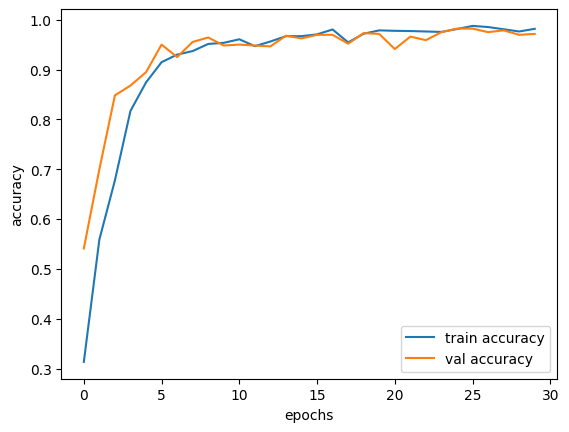

In [41]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

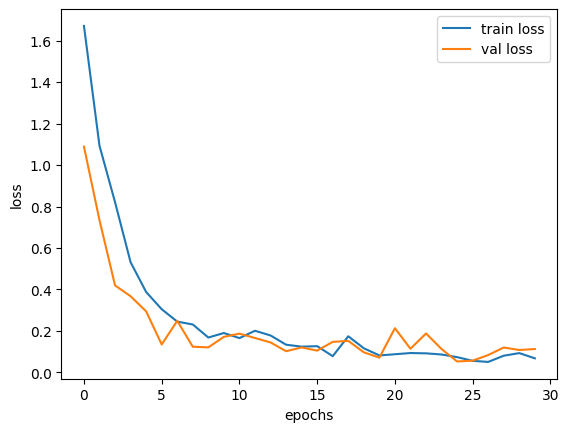

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [43]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

18/18 [==============================] - 1s 35ms/step


In [44]:
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79  0  1  4  0  0  0]
 [ 0 84  0  0  0  1  1]
 [ 0  0 78  0  0  0  0]
 [ 0  0  0 70  0  7  0]
 [ 0  0  0  0 73  0  0]
 [ 0  1  0  1  0 87  0]
 [ 0  0  0  0  0  0 73]]


In [46]:
#Print the classification report
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

       angry       1.00      0.94      0.97        84
     disgust       0.99      0.98      0.98        86
        fear       0.99      1.00      0.99        78
       happy       0.93      0.91      0.92        77
     neutral       1.00      1.00      1.00        73
          ps       0.92      0.98      0.95        89
         sad       0.99      1.00      0.99        73

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



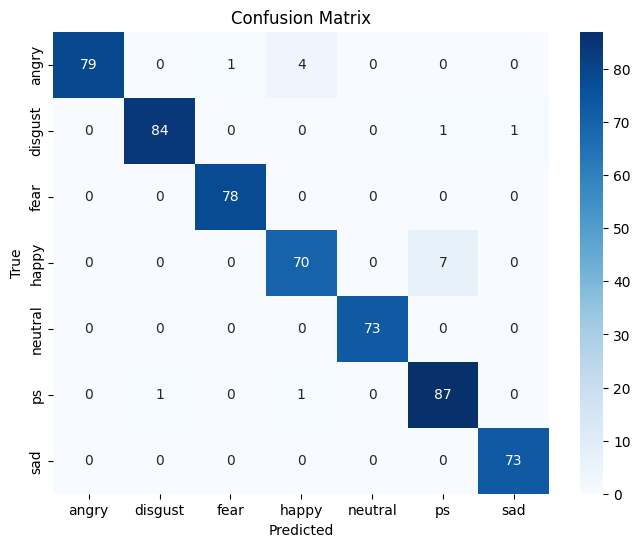

In [47]:
#Correlation HeatMap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Conclusion**
This project successfully demonstrates the potential of using LSTM networks for emotion recognition in speech data. Through meticulous data preprocessing and feature extraction, the model was trained to classify emotions with notable accuracy. The results, visualized through various plots and a confusion matrix, indicate the model's ability to distinguish between different emotional states effectively. While the current implementation provides a solid foundation, future work could focus on expanding the dataset, advanced deep learning techniques to further enhance the model's performance. The findings from this project contribute to the growing field of emotion recognition, paving the way for more sophisticated and empathetic human-computer interactions.